In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, make_scorer, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
wine_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

#Viewing the data
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Getting information about the data columns
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#Data columns = 12 and 1599 rows

In [5]:
#Analysing data using Graphical methods

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

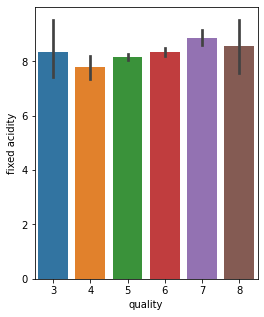

In [6]:
#Analyzing the fixed acidity against the quality of the the wine.  

fig = plt.figure(figsize = (4,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)

In [7]:
#Acidity does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

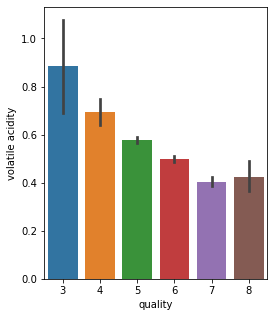

In [8]:
#We will check for the similar effect for volatile acidity
fig = plt.figure(figsize = (4,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

In [9]:
#We can see decreasing trend in volatile acidity as we go higher

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

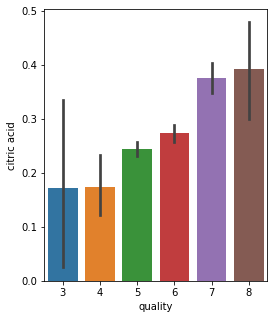

In [10]:
#We will check the citric acid quantity against the quality of red wine
fig = plt.figure(figsize = (4,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)

In [11]:
#Citric acid composition goes higher as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

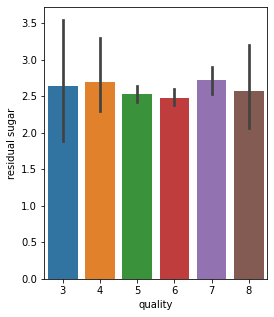

In [12]:
#We will analyze the residual sugar against the quality of the wine
fig = plt.figure(figsize = (4,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

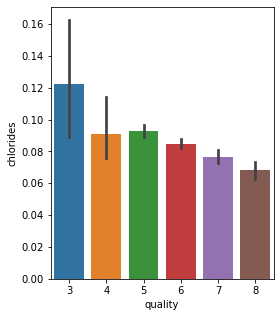

In [13]:
#We will analyse the composition of chloride against the quality of wine
fig = plt.figure(figsize = (4,5))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_data)

In [14]:
#Composition of chloride goes down as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

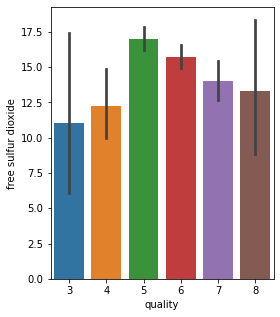

In [15]:
#We will analyse the composition of free sulfur dioxide against the quality of wine
fig = plt.figure(figsize = (4,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

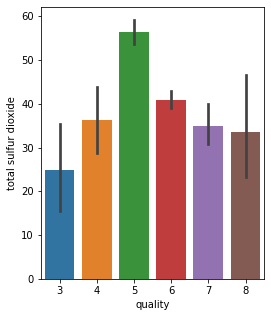

In [16]:
#We will analyse the composition of total sulfur dioxide against the quality of wine
fig = plt.figure(figsize = (4,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_data)

In [17]:
# We can see that free sulfur dioxide and total sulfur dioxide content does not have a visible trend against quality of the wine

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

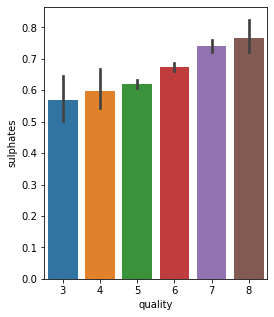

In [18]:
# This plot will give relation between sulphates and quality
fig = plt.figure(figsize = (4,5))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data)

In [19]:
# Level of Sulphates go higher with the quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

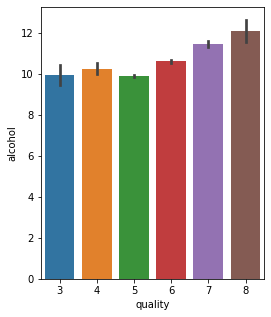

In [20]:
fig = plt.figure(figsize = (4,5))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_data)

In [21]:
# Level of Alcohol level also goes higher as the quality of wine increases.

In [22]:
#Let us plot the correlation matrix to get the correlation of independent variables on the dependent variable.

<AxesSubplot:>

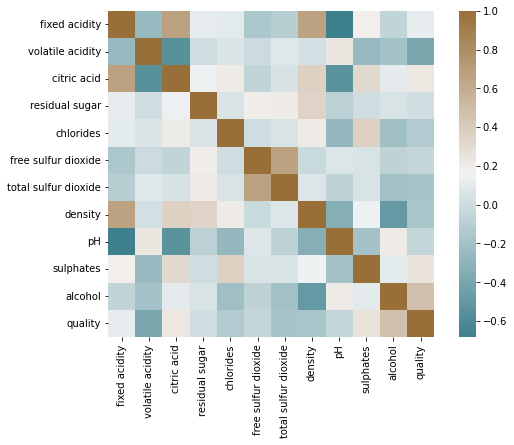

In [23]:
d, ax = plt.subplots(figsize=(9, 6))
corr = wine_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(210, 50, as_cmap=True),
            square=True, ax=ax)

In [24]:
#Features like volatile acidity, alcohol, chlorides are correlated to quality of alcohol to a great extent. 

In [25]:
#Preprocessing Data for Machine learning algorithms

In [26]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [27]:
#We have quality of the wine as discrete variable ranging from 3 to 8.

In [28]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

In [29]:
#Converting it into 0/1
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])

In [30]:
wine_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [31]:
#Checking Skewness of the data

#Separating the X and Y variable
x = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

In [32]:
#Train and Test splitting of data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify= wine_data['quality'], random_state = 42)

In [33]:
print (y_train.value_counts())
print (y_test.value_counts())

0    1105
1     174
Name: quality, dtype: int64
0    277
1     43
Name: quality, dtype: int64


In [34]:
#Applying Standard scaling to get optimized result.

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [35]:
#Applying the simple logistic regression algorithm

In [36]:
logicregres= LogisticRegression()
logicregres.fit(x_train, y_train)
pred_logicregres= logicregres.predict(x_test)

In [37]:
print (accuracy_score(y_test, pred_logicregres))

0.89375


In [38]:
#Let us check the confusion matrix

In [39]:
print(confusion_matrix(y_test, pred_logicregres))

[[269   8]
 [ 26  17]]


In [40]:
#Confusion matrix tells us that the count of false negative is quite high (higher than true positive). FN= 26, TP= 17

In [41]:
#Lets us check f1 score

In [42]:
print (f1_score(y_test, pred_logicregres))

0.5


In [43]:
#Let us apply Random Forest Classifier

In [44]:
rfc = RandomForestClassifier(n_estimators=10, random_state=2)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [45]:
accuracy_score(y_test, pred_rfc)

0.91875

In [46]:
f1_score(y_test, pred_rfc)

0.6060606060606061

In [47]:
#Using random forest, the f1 score is improved

In [48]:
#Let us list down the parameters to keep in the grid for Grid Search CV
parameters = {'n_estimators': [30, 40, 50,100,200,300], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy','gini'],
              'max_depth': [10, 15, 18, 20, 25, 30], 
              'min_samples_split': [2, 3, 5, 7],
              'min_samples_leaf': [1,5,8]
             }
acc_scorer = make_scorer(f1_score)

In [49]:
rfc3 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=20,max_features='sqrt',
                              min_samples_leaf=1,min_samples_split=3, random_state=2  )

In [50]:
rfc3.fit(x_train, y_train)
pred_rfc3= rfc3.predict(x_test)

In [51]:
print ("f1 score is ", f1_score(y_test, pred_rfc3))
print ("Accuracy is ", accuracy_score(y_test, pred_rfc3))

f1 score is  0.7142857142857142
Accuracy is  0.9375


In [52]:
#We see that f1 score is improved and so is the accuracy.